# RISK MANAGMENT FOR INSURANCE COMPANIES AGAINST FIRMS

## Problem Statment : 

Insurance company has started to offer insurance to the firms in the IT market via insurance program.

The insurance company has recently provided the insurance to 6800 firms. Due to the economic crises in the current scenario out of 6800, 220 firms went bankrupt. Due to this crises the insurance company has got a severe headache to pay to the firms on their insurance claims. 

The insurance company is shocked by the failure of their current strategy to provide insurance. The shocking scenario is the result of their customers(firms) going bankrupt.

To avoid the same in the future, I have developed a model to identify who should be given an insurance in future on the basis of the bankruptcy of the firms. Insurance company have shared the details that adding a new firm into the insurance policy will profit them \\$1,000 per customer and on the insurance claims by a firm results in the loss of \\$50,000 per firm. They have an additional 68,000 firms lined up to get an insurance.

## Install and/or import necessary packages

Installation of the necessary packages and setting random seed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score ,f1_score,classification_report, make_scorer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.utils import resample
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Preliminary business problem Solving

I have jot down what would have been the total profit and loss (P&L) for the insurance company as of now from the bankruptcies and will be predicting the companies who would be bankrupt from the economic crises.

In [3]:
# Insurance company will not provide a loan as they thought the company might go bankrupt and the firm went bankrupt. 
TP_profit = 0   #Insurance company made no profit no loss as they didnt target such firms.

# Insurance company didnt target the firms as they thought the firm might go bankrupt but the firm didnt.
FP_profit = -1000   #Insurance company lost their potential customers.

# Insurance company targeted the wrong firms.
FN_profit = -50000 + 1000 #Insurance company have to pay to the firms insurance claims.

# Insurance company target the perfect firms who didnt go bankrupt.
TN_profit = 1000 #Insurance company made profit out of it.

# in the null model there are only FP's and TP's because everyone is considered a possible customer
original_profit = 220*TN_profit + (6800-220)*FN_profit
print(f"${original_profit:,.2f}")

$-322,200,000.00


In [6]:
trial_N = 6800 # number of observations in the original sample 
rollout_N = 50_000 # the sample of frims they plan to roll the new model out to

Using the same approach on the remaining 50000 customers would not turn out to be in favour of the insurance company.

In [7]:
print(f"${original_profit*50000/6800:,.2f}") #

$-2,369,117,647.06


This analysis shows that if the insurance company continues the same approach to provide insurance to firms that would be a huge loss to the company. Therfore it is clear that insurance company needs a better model to foresee the firms bankruptcy. The best model possible would be 100% accurate. Economic crises resulted in 220 out of 6800 firms going bankrupt. The rate 220/6800 is, therfore, the expected rate of firms that take the insurance, and thus the expected profit result from the perfectly accurate model will turn out to be: 

In [8]:
print(f"${220*50000/6800*FN_profit:,.2f}") #

$-79,264,705.88


Setting the random seed

In [9]:
random_seed = 1
np.random.seed(random_seed)

In [10]:
# this will be useful for later calculations involving the confusion matrix
pl_matrix = np.array([[TN_profit, FP_profit],[FN_profit, TP_profit]]) 
pl_matrix

array([[  1000,  -1000],
       [-49000,      0]])

 ## Load the dataset

Loading the file with read_csv command and printing the top 10 values

In [11]:
df = pd.read_csv('.../FinancialData.csv')
df.head(10)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,370,424,405,601,601,998,796,808,302,...,716,9.0,622,601,827,290,26,564,1000,16
1,1,464,538,516,610,610,998,797,809,303,...,795,8.0,623,610,839,283,264,570,1000,20
2,1,426,499,472,601,601,998,796,808,302,...,774,40.0,623,601,836,290,26,563,1000,16
3,1,399,451,457,583,583,998,796,808,303,...,739,3.0,622,583,834,281,26,564,1000,23
4,1,465,538,522,598,598,998,797,809,303,...,795,3.0,623,598,839,278,24,575,1000,35
5,1,388,415,419,590,590,998,796,808,303,...,710,5.0,622,590,829,285,26,564,1000,19
6,0,390,445,436,619,619,998,797,808,302,...,736,18.0,623,619,829,292,26,564,1000,15
7,0,508,570,559,601,601,999,797,809,303,...,815,10.0,623,601,841,278,27,566,1000,34
8,0,488,545,543,603,603,998,797,809,303,...,803,0.0,623,603,840,276,26,565,1000,65
9,0,495,550,542,599,599,999,797,809,303,...,804,5.0,623,599,840,279,27,566,1000,30


## Explore and Clean the dataset

Exploring the columns

In [12]:
df.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit 

Finding the datatypes of columns

In [13]:
df.dtypes

Bankrupt                                                    int64
 ROA(C) before interest and depreciation before interest    int64
 ROA(A) before interest and % after tax                     int64
 ROA(B) before interest and depreciation after tax          int64
 Operating Gross Margin                                     int64
                                                            ...  
 Liability to Equity                                        int64
 Degree of Financial Leverage (DFL)                         int64
 Interest Coverage Ratio (Interest expense to EBIT)         int64
 Net Income Flag                                            int64
 Equity to Liability                                        int64
Length: 96, dtype: object

Checking for any null values

In [14]:
df.isnull().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Renaming the column for further use

In [15]:
df.columns = [s.strip().upper().replace(' ', '_') for s in df.columns] 

Checking the column names after the change

In [16]:
for name in df:
    print(name)

BANKRUPT
ROA(C)_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST
ROA(A)_BEFORE_INTEREST_AND_%_AFTER_TAX
ROA(B)_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX
OPERATING_GROSS_MARGIN
REALIZED_SALES_GROSS_MARGIN
OPERATING_PROFIT_RATE
PRE-TAX_NET_INTEREST_RATE
AFTER-TAX_NET_INTEREST_RATE
NON-INDUSTRY_INCOME_AND_EXPENDITURE/REVENUE
CONTINUOUS_INTEREST_RATE_(AFTER_TAX)
OPERATING_EXPENSE_RATE
RESEARCH_AND_DEVELOPMENT_EXPENSE_RATE
CASH_FLOW_RATE
INTEREST-BEARING_DEBT_INTEREST_RATE
TAX_RATE_(A)
NET_VALUE_PER_SHARE_(B)
NET_VALUE_PER_SHARE_(A)
NET_VALUE_PER_SHARE_(C)
PERSISTENT_EPS_IN_THE_LAST_FOUR_SEASONS
CASH_FLOW_PER_SHARE
REVENUE_PER_SHARE_(YUAN_¥)
OPERATING_PROFIT_PER_SHARE_(YUAN_¥)
PER_SHARE_NET_PROFIT_BEFORE_TAX_(YUAN_¥)
REALIZED_SALES_GROSS_PROFIT_GROWTH_RATE
OPERATING_PROFIT_GROWTH_RATE
AFTER-TAX_NET_PROFIT_GROWTH_RATE
REGULAR_NET_PROFIT_GROWTH_RATE
CONTINUOUS_NET_PROFIT_GROWTH_RATE
TOTAL_ASSET_GROWTH_RATE
NET_VALUE_GROWTH_RATE
TOTAL_ASSET_RETURN_GROWTH_RATE_RATIO
CASH_REINVESTMENT_%
CURRENT

## Predictors and Target variables Split

In [17]:
y = df.pop('BANKRUPT')
X = df

## Partitioning data into training and test data sets

We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, as we are only testing two models and we wish to allocated as much data as possible to training and validation steps.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

Out of 96 columns, we are trying to get the columns which have major impact on the target variable 

Checking through the HeatMap

<AxesSubplot:>

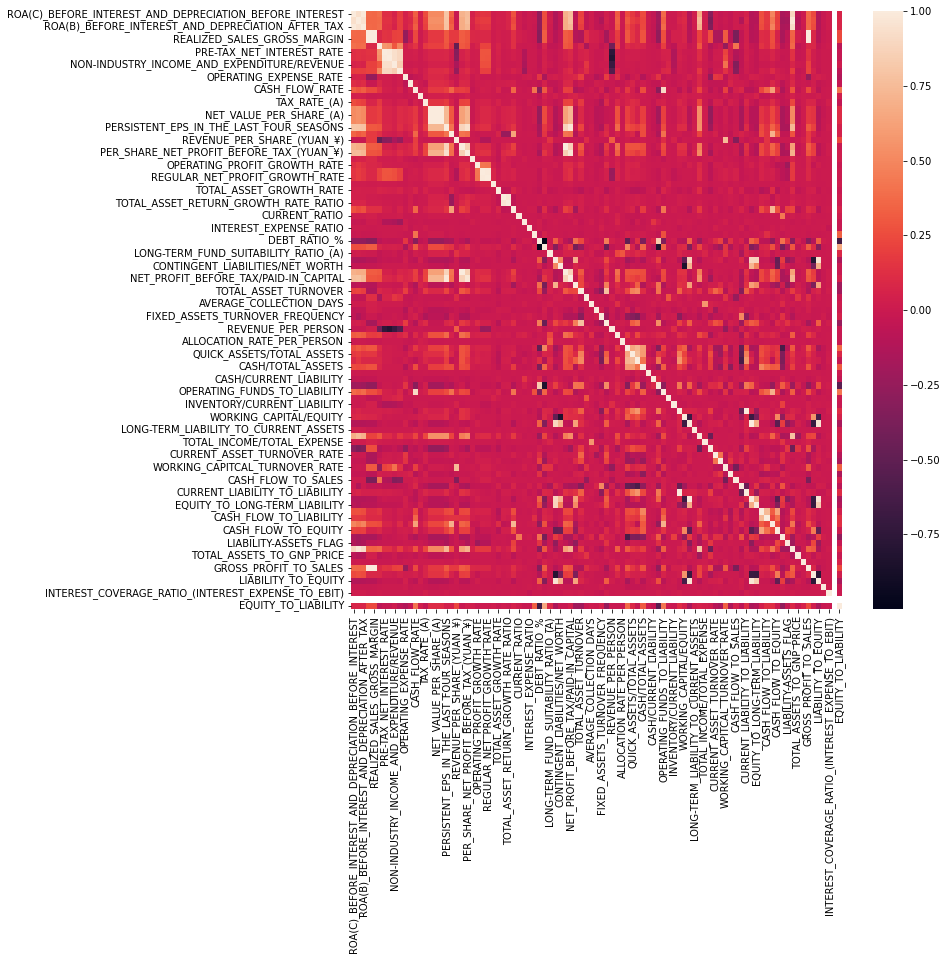

In [19]:
import seaborn as sns
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

Checking the correlation and picking the name of the impact variables

In [20]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # only interested in absolute coeff value
                colname = corr_matrix.columns[i]  # picking the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

30

Printing the necessary columns

In [22]:
corr_features

{'AFTER-TAX_NET_INTEREST_RATE',
 'CONTINUOUS_INTEREST_RATE_(AFTER_TAX)',
 'CURRENT_ASSETS/TOTAL_ASSETS',
 'CURRENT_LIABILITIES/EQUITY',
 'CURRENT_LIABILITY_TO_ASSETS',
 'CURRENT_LIABILITY_TO_EQUITY',
 'CURRENT_LIABILITY_TO_LIABILITY',
 'EQUITY_TO_LONG-TERM_LIABILITY',
 'GROSS_PROFIT_TO_SALES',
 'LIABILITY_TO_EQUITY',
 "NET_INCOME_TO_STOCKHOLDER'S_EQUITY",
 'NET_INCOME_TO_TOTAL_ASSETS',
 'NET_PROFIT_BEFORE_TAX/PAID-IN_CAPITAL',
 'NET_VALUE_PER_SHARE_(A)',
 'NET_VALUE_PER_SHARE_(C)',
 'NET_WORTH/ASSETS',
 'NET_WORTH_TURNOVER_RATE_(TIMES)',
 'NON-INDUSTRY_INCOME_AND_EXPENDITURE/REVENUE',
 'OPERATING_FUNDS_TO_LIABILITY',
 'OPERATING_PROFIT/PAID-IN_CAPITAL',
 'OPERATING_PROFIT_PER_SHARE_(YUAN_¥)',
 'PERSISTENT_EPS_IN_THE_LAST_FOUR_SEASONS',
 'PER_SHARE_NET_PROFIT_BEFORE_TAX_(YUAN_¥)',
 'REALIZED_SALES_GROSS_MARGIN',
 'REGULAR_NET_PROFIT_GROWTH_RATE',
 'REVENUE_PER_PERSON',
 'ROA(A)_BEFORE_INTEREST_AND_%_AFTER_TAX',
 'ROA(B)_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX',
 'TOTAL_ASSET_RETURN_G

## Drop the unnecessary columns

In [23]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,ROA(C)_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST,OPERATING_GROSS_MARGIN,OPERATING_PROFIT_RATE,PRE-TAX_NET_INTEREST_RATE,OPERATING_EXPENSE_RATE,RESEARCH_AND_DEVELOPMENT_EXPENSE_RATE,CASH_FLOW_RATE,INTEREST-BEARING_DEBT_INTEREST_RATE,TAX_RATE_(A),NET_VALUE_PER_SHARE_(B),...,CFO_TO_ASSETS,CASH_FLOW_TO_EQUITY,CURRENT_LIABILITY_TO_CURRENT_ASSETS,LIABILITY-ASSETS_FLAG,TOTAL_ASSETS_TO_GNP_PRICE,NO-CREDIT_INTERVAL,DEGREE_OF_FINANCIAL_LEVERAGE_(DFL),INTEREST_COVERAGE_RATIO_(INTEREST_EXPENSE_TO_EBIT),NET_INCOME_FLAG,EQUITY_TO_LIABILITY
313,477,601,998,797,0.000000e+00,9.680000e+11,464,0.000000e+00,56,196,...,583,314,18,0,2.0,624,26,565,1000,47
6724,471,597,998,797,5.820000e+12,2.070000e+12,464,0.000000e+00,0,196,...,604,314,35,0,3.0,623,28,568,1000,28
4494,455,606,998,797,0.000000e+00,0.000000e+00,462,0.000000e+00,0,175,...,575,318,33,0,16.0,623,26,564,1000,26
5422,491,602,999,797,0.000000e+00,1.700000e+12,464,8.700000e+11,202,177,...,583,317,24,0,1.0,625,26,565,1000,28
2754,506,602,999,797,9.070000e+12,2.210000e+11,464,0.000000e+00,405,175,...,594,315,30,0,1.0,623,27,566,1000,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,539,611,999,797,0.000000e+00,5.870000e+12,476,0.000000e+00,91,230,...,639,328,14,0,1.0,624,26,565,1000,70
1331,476,597,998,797,5.050000e+12,0.000000e+00,461,0.000000e+00,239,181,...,562,311,40,0,1.0,623,27,567,1000,20
6372,480,595,998,797,2.790000e+12,4.750000e+11,462,0.000000e+00,186,229,...,583,315,33,0,13.0,622,27,566,1000,18
6715,521,601,999,797,5.750000e+12,3.820000e+12,470,0.000000e+00,224,228,...,629,313,22,0,2.0,624,26,565,1000,47


### Address any data imbalances

In [24]:
y_train.value_counts()

0    4624
1     149
Name: BANKRUPT, dtype: int64

### Bargraph for the imbalanced data

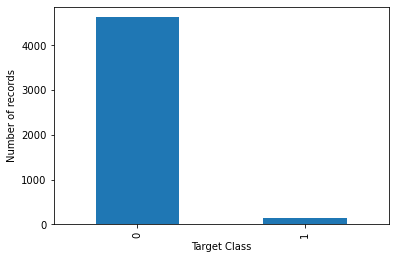

In [25]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

# Data Balancing

We will utilize an oversamplying technique to address any necessary date balancing.

In [26]:
ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts()

0    4624
1    4624
Name: BANKRUPT, dtype: int64

### Bargraph for balanced data

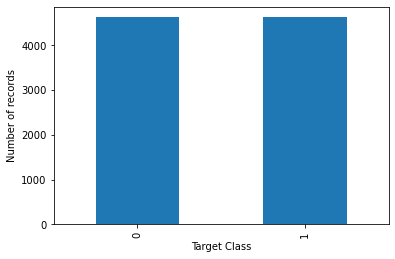

In [27]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

Transform the values of train and test predictors

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# KNN using default parameters

In [26]:
knn = KNeighborsClassifier(n_neighbors=int(len(X_train)**0.5),  metric='euclidean') # user euclidean distance
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=96)

## Train a k-NN model 

Since we know the k-NN models are very sensitive to differences in scale, we have rescaled our variables before fitting the model.

In [27]:
knn = KNeighborsClassifier(n_neighbors = int(len(y_train)**(1/2)), metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1628, 1: 418}

Checking for confusion matrix values

In [28]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[1616,  359],
       [  12,   59]], dtype=int64)

In [29]:
TP = confusion[1, 1] # True Positives
TN = confusion[0, 0] # True Negatives
FP = confusion[0, 1] # False Positives
FN = confusion[1, 0] # False Negatives

Predicting the values of Recall, Accuracy, Precision and F1 Score.

Why Recall? 
Selection of “Recall’’ as a deciding parameter here, is because we think that the FN case has a greater impact on the scenario as compared with the FP case. i.e. Our model is predicting the company will not go bankrupt and in actuality, it will go bankrupt in this case the insurance company will have to pay for the losses. 

In [30]:
y_pred = knn.predict(X_test)
print("*************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print("*************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")
print("*************************************")

*************************************
Recall Score:     0.8309859154929577
*************************************
Accuracy Score:   0.8186705767350929
Precision Score:  0.14114832535885166
F1 Score:         0.24130879345603268
*************************************


# KNN with hyperparameter tuning

In [31]:
recall = []
for i in range(1,int(len(X_train)**0.5)*2,2):
    knn = KNeighborsClassifier(n_neighbors=i,  metric='minkowski')
    knn.fit(X_train, y_train)
    knn_prediction_output = knn.predict(X_test)
    confusion = confusion_matrix(y_test, knn_prediction_output)
    TP = confusion[1, 1] 
    TN = confusion[0, 0] 
    FP = confusion[0, 1] 
    FN = confusion[1, 0] 
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score= (2 * precision * recall) / (precision + recall)
    print(f"for k = {i} model profit recall is {recall*100:,.4f}")

for k = 1 model profit recall is 26.7606
for k = 3 model profit recall is 38.0282
for k = 5 model profit recall is 45.0704
for k = 7 model profit recall is 49.2958
for k = 9 model profit recall is 52.1127
for k = 11 model profit recall is 52.1127
for k = 13 model profit recall is 56.3380
for k = 15 model profit recall is 60.5634
for k = 17 model profit recall is 63.3803
for k = 19 model profit recall is 66.1972
for k = 21 model profit recall is 66.1972
for k = 23 model profit recall is 71.8310
for k = 25 model profit recall is 71.8310
for k = 27 model profit recall is 73.2394
for k = 29 model profit recall is 73.2394
for k = 31 model profit recall is 73.2394
for k = 33 model profit recall is 74.6479
for k = 35 model profit recall is 74.6479
for k = 37 model profit recall is 74.6479
for k = 39 model profit recall is 77.4648
for k = 41 model profit recall is 76.0563
for k = 43 model profit recall is 77.4648
for k = 45 model profit recall is 78.8732
for k = 47 model profit recall is 80.28

Result of Knn hyperparameter: We can see that the best recall value comes out to be 87.3239 when k = 179 

## Classification report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1975
           1       0.16      0.87      0.26        71

    accuracy                           0.83      2046
   macro avg       0.57      0.85      0.58      2046
weighted avg       0.97      0.83      0.88      2046



# Decision Tree using default parameters

Creating the decision tree using the default parameters

In [36]:
dtree=DecisionTreeClassifier(random_state=random_seed)

Fitting the model to train the dataset

In [37]:
_ = dtree.fit(X_train, y_train)

Review of the performance of the model on the validation/test data

In [38]:
y_pred = dtree.predict(X_test)
print("*************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print("*************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print("*************************************")

*************************************
Recall Score:     0.3380281690140845
*************************************
Accuracy Score:   0.9525904203323559
Precision Score:  0.32432432432432434
*************************************


Constructing the confusion matrix

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1925,   50],
       [  47,   24]], dtype=int64)

# Decision Tree with hyperparameter tuning

Checking the values of hyperparameters

In [40]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

Checking the depth and number of leaves

In [41]:
print(dtree.get_depth())
print(dtree.get_n_leaves())

46
148


Implementing the decision tree with hyperparameters

In [42]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 4000, 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 5)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 1000,5)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 5)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }



In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dtree_default = DecisionTreeClassifier(random_state=1)

best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=1), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 2000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train)

In [44]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0002, 'max_leaf_nodes': None, 'max_depth': None, 'criterion': 'gini'}


In [45]:
print('Best score is {}'.format(best_random_search_model.best_score_))

Best score is 1.0


Review of the performance of the model on the validation/test data with hyperparameters

In [46]:
validation_predictions = best_random_search_model.predict(X_test)
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred,average ='weighted'))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred,average ='weighted', zero_division=0))

Confusion Matrix:  [[1925   50]
 [  47   24]]
Recall score:
 0.9525904203323559
Accuracy score:
 0.9525904203323559
Precision score:
 0.9535462003972767


# Random Forest using default parameters

Creating the random forest using the default parameters

In [29]:
rforest = RandomForestClassifier(random_state=1)

Fitting the model to train the dataset

In [30]:
_ = rforest.fit(X_train,y_train)

Predicting the model result

In [31]:
y_pred = rforest.predict(X_test)

Constructing the confusion matrix

In [32]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred,average ='weighted'))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred,average ='weighted', zero_division=0))

Confusion Matrix:  [[1961   14]
 [  54   17]]
Recall score:
 0.9667644183773216
Accuracy score:
 0.9667644183773216
Precision score:
 0.9584591613727931


Printing this value for the future reference

In [35]:
confusion = confusion_matrix(y_test, y_pred)

# RandomForest using hyperparameter tuning

Creating the random forest using the hyperparameters parameters

In [51]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 4000, 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 5)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 1000,5)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 5)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }



In [52]:
rforest = RandomForestClassifier(random_state=1)

best_random_search_model = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=1), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 500, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train)

In [53]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 126, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': None, 'max_depth': 4000, 'criterion': 'entropy'}


In [54]:
print('Best score is {}'.format(best_random_search_model.best_score_))

Best score is 0.9984862509700523


Constructing the confusion matrix 

In [55]:
y_pred = best_random_search_model.predict(X_test)
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred,average ='weighted'))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred,average ='weighted', zero_division=0))

Confusion Matrix:  [[1901   74]
 [  31   40]]
Recall score:
 0.9486803519061584
Accuracy score:
 0.9486803519061584
Precision score:
 0.9619854946772345


# GradientBoostingClassifier using default parameters

Creating the GradBoost using the default parameters

In [56]:
gboost = GradientBoostingClassifier(random_state=1)

Fitting the model to train the dataset

In [57]:
_ = gboost.fit(X_train,y_train)

Predicting the GradBoost model result

In [58]:
y_pred = gboost.predict(X_test)

Constructing the confusion matrix 

In [59]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred,average ='weighted'))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred,average ='weighted', zero_division=0))

Confusion Matrix:  [[1838  137]
 [  24   47]]
Recall score:
 0.9213098729227761
Accuracy score:
 0.9213098729227761
Precision score:
 0.9617201227646082


# Gradient boosting with hyperparameter

Creating the GradBoost using the hyperparameters

In [61]:
# Criterion used to guide data splits
criterion = ['squared_error']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 4000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 1000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
max_leaf_nodes.append(None)
# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }


In [62]:
gboost = GradientBoostingClassifier(random_state=1)

best_random_search_model = RandomizedSearchCV(
        estimator=GradientBoostingClassifier(random_state=1), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 125, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train)

In [63]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 184, 'min_samples_leaf': 836, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 335, 'max_depth': 2041, 'criterion': 'squared_error'}


In [64]:
print('Best score is {}'.format(best_random_search_model.best_score_))

Best score is 1.0


In [65]:
y_pred = best_random_search_model.predict(X_test)

Constructing the confusion matrix

In [66]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred,average ='weighted'))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred,average ='weighted', zero_division=0))

Confusion Matrix:  [[1839  136]
 [  22   49]]
Recall score:
 0.9227761485826002
Accuracy score:
 0.9227761485826002
Precision score:
 0.9630780756883616


# Logistic Regression with Hyperparameter Tuning

Creating the logistic regression using the hyperparameters

In [76]:
from sklearn.linear_model import LogisticRegression
param_grid = { 'solver': ['saga','sag'],
                      'penalty': ['l2','none'], # NOTE: 'elasticnet' is only supported by 'saga' solver
                      'C': [100, 10, 1.0, 0.1, 0.01],
                      'max_iter': [5000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }

In [77]:
best_lregression = GridSearchCV(estimator=LogisticRegression(random_state=0),
                                    scoring='recall', param_grid=param_grid, 
                                    cv=10, verbose=0,  n_jobs = -1)
best_lregression = best_lregression.fit(X_train, y_train)

Constructing the Confusion Matrix

In [78]:
y_pred = best_lregression.predict(X_test)
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")

print("***********************")

***********************
Accuracy Score:   0.870
***********************
Recall Score:     0.732
Precision Score:  0.174
***********************


# Neural Network using default parameters

Creating the neural network using the default parameters

In [84]:
from sklearn.neural_network import MLPClassifier

Fitting the model to train the dataset

In [85]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(500,200,100,10), solver='adam', max_iter=5000,random_state =1)
_ = ann.fit(X_train, y_train)

CPU times: total: 1min 4s
Wall time: 10.8 s


In [86]:
%%time

y_pred = ann.predict(X_test)

CPU times: total: 188 ms
Wall time: 30.4 ms


Printing the classification report of Neural Network

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1975
           1       0.37      0.31      0.34        71

    accuracy                           0.96      2046
   macro avg       0.67      0.65      0.66      2046
weighted avg       0.95      0.96      0.96      2046



Constructing the Confusion Matrix

In [88]:
y_pred = ann.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")

[[1937   38]
 [  49   22]]
***********************
Accuracy Score:   0.957
***********************
Recall Score:     0.310
Precision Score:  0.367


# Neural Network with hyperparameter tuning

Creating the neural network using the hyperparameters

In [91]:
score_measure = 'recall'
param_grid = {
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['sgd','adam']
}
gridSearchAnn = GridSearchCV(MLPClassifier(hidden_layer_sizes=(500,200,100,10), max_iter=20000), param_grid, scoring=score_measure, n_jobs=-1)

gridSearchAnn.fit(X_train, y_train)

y_pred = gridSearchAnn.predict(X_test)
print(score_measure, 'score: ', gridSearchAnn.best_score_)
print(f"{'Recall Score: ':18}{recall_score(y_test, y_pred):.3f}")
print('parameters: ', gridSearchAnn.best_params_)

recall score:  1.0
Recall Score:     0.366
parameters:  {'activation': 'tanh', 'solver': 'sgd'}


# Prediction with ADABoost (using default parameters)

Creating the ADABoost using the default parameters

In [94]:
aboost = AdaBoostClassifier(random_state=1)

Fitting the model to train the dataset

In [95]:
_ = aboost.fit(X_train,y_train)

Predicting the ADABoost model result

In [96]:
y_pred = aboost.predict(X_test)

Constructing the Confusion Matrix

In [97]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred,average ='weighted'))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred,average ='weighted', zero_division=0))

Confusion Matrix:  [[1798  177]
 [  23   48]]
Recall score:
 0.9022482893450635
Accuracy score:
 0.9022482893450635
Precision score:
 0.9605090818908112


# Prediction with ADABoost (using hyperparameter tuning)

Creating the ADABoost using the hyperparameter tuning

In [98]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']

n_estimators = [int(x) for x in np.linspace(1, 4000, 10)]
n_estimators.append(None)


learning_rate = [(0.97 + x / 100) for x in range(0, 10)]

# Create the random grid
param_grid_random = { #'criterion': criterion,
                      
                     'n_estimators': n_estimators,
                     'learning_rate': learning_rate,                     
                     #'algorithm': algorithm,                     
                      #'min_samples_split': min_samples_split,
                      #'min_samples_leaf' : min_samples_leaf,
                      #'max_leaf_nodes' : max_leaf_nodes,
                      #'min_impurity_decrease' : min_impurity_decrease,
                     }


In [99]:
estimator= AdaBoostClassifier(random_state= 1)
estimator.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [100]:
aboost = AdaBoostClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
        estimator= AdaBoostClassifier(random_state=1), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 50, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 132, in fit
    self._validate_estimator()
  File "C:\Users\User\an

In [101]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'n_estimators': 445, 'learning_rate': 0.98}


In [102]:
y_pred = best_random_search_model.predict(X_test)

Constructing the Confusion Matrix

In [103]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred,average ='weighted'))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred,average ='weighted', zero_division=0))

Confusion Matrix:  [[1901   74]
 [  44   27]]
Recall score:
 0.9423264907135875
Accuracy score:
 0.9423264907135875
Precision score:
 0.9527377980355461


# Prediction with XGBoost (using default parameters)

Creating a variable for XGBoost classifier

In [104]:
xgboost = XGBClassifier(random_state=1)

Fitting the model to train the dataset

In [105]:
_ = xgboost.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:09:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
y_pred = xgboost.predict(X_test)

Constructing the Confusion Matrix

In [107]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred,average ='macro'))
print('Recall score:\n', recall_score(y_test, y_pred,average ='macro'))

Confusion Matrix:  [[1944   31]
 [  44   27]]
Accuracy score:
 0.9633431085043989
Precision score:
 0.7216922222993131
Recall score:
 0.6822927438045997


Predicting the XGBoost Model outputs

In [108]:
xgboost_recall = recall_score(y_test, y_pred)

Print out the recall value of XGBoost

In [109]:
print(xgboost_recall)

0.38028169014084506


### By checking all the algorithms, we figured out that the best value of recall comes from the Random Forest Algorithm which was 96.67% using default parameters.

Taking in consideration the random forest algorithm below is the final profit for the insurance company.

In [37]:
TP = confusion[1, 1] 
TN = confusion[0, 0] 
FP = confusion[0, 1] 
FN = confusion[1, 0] 
confusion_perc = confusion/2040 
rf_result = confusion_perc * 50000
p_and_l = np.array([[TN_profit, FP_profit],[FN_profit, TP_profit]])
rf_result * p_and_l
model_profit = (rf_result * p_and_l).sum()
model_profit
print(f"${model_profit:,.2f}")

$442,377,450.98


# Business Impact Summary

The insurance company offered 6800 existing firms the insurance. Of the 6800 firms, 220 went bankrupt. Since the firm has to pay \\$1000 to the insurance company to purchase the insurance. The insurance company's profit from getting a firm to join them turns out to be \\$1000 but if the firm goes bankrupt the insurance company has to pay from its own pocket \\$50000 ultimately resulting in a loss of  \\$49000 (-\\$50000 + \\$1000). If this 'null model' approach were used on the remaining 50,000 customers, this would result in a loss of \\$79,264,705.88. 

Using different modelling techniques I have figured out that the random forest model had the best recall value at 96.67
Using a random forest model with default parameters on the bankruptcy dataset, the expected total profit resulted out to be $442,377,450.98.

Based on the expected performance of the proposed model by the paramount team, the Insurance company could proceed with implementing a profitable business. However, the data shows a significant imbalance as there are companies which went bankrupt. If we could reduce the negative effect of the unbalanced data set, there is an opportunity to develop a better-performing model resulting in greater profit for the Insurance company.